## Quantum Postulates

In [1]:
# Importing required packages
from qiskit import QuantumRegister, QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import Image

# Specifying the quantum simulator for simulating the circuits
sim = Aer.get_backend('aer_simulator')

### Postulate 1
#### At each instant the state of a quantum physical system is represented by a ket |ψ〉in the space of states.

$$\newcommand{\ket}[1]{|#1\rangle}$$
We know that 
$$\ket{0} = \begin{bmatrix} 1   \\ 0 \end{bmatrix}$$
and 
$$\ket{1} = \begin{bmatrix} 0   \\ 1 \end{bmatrix}$$
Also both of these are orthonormal to each other so their linear comination can be used to span out all possible qubit states. 

Let q be one such arbitary qubit:

$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\ket{q} = \frac{1}{\sqrt{2}}\ket{0} + \frac{i}{\sqrt{2}}\ket{1}$$

$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\ket{q} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1   \\ 0 \end{bmatrix} + \frac{i}{\sqrt{2}}\begin{bmatrix} 0   \\ 1 \end{bmatrix}$$

$$q =\begin{bmatrix} \frac{1}{\sqrt{2}}   \\ \frac{i}{\sqrt{2}} \end{bmatrix}$$

This is the unit vector in hilbert space that represents the given quantum state.Hilbert space is a comple inner product space with n dimensions

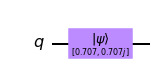

In [2]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)  

# Define initial_state as the one mentioned above
initial_state = [1/sqrt(2),1.j/sqrt(2)]     

# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0) 

# Displaying the quantum circuit
qc.draw(output="mpl")

In [3]:
# Simulator saves the statevector
qc.save_statevector()   

# Run the simulation and return the result
result = sim.run(qc).result()

In [4]:
# Get the output state vector
output_state = result.get_statevector()

# Display the output state vector
print(output_state) 

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


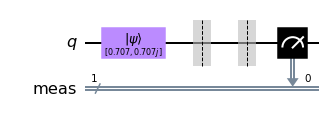

In [5]:
# Measure and display the quantum circuit 
qc.measure_all()
qc.draw(output="mpl")

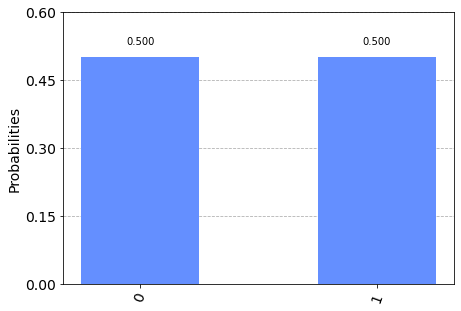

In [6]:
# Probability of the output state
counts = result.get_counts()
plot_histogram(counts)

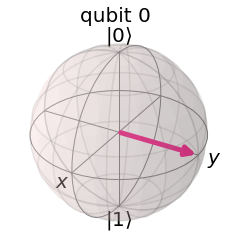

In [7]:
# Representing the qubit on a Bloch Sphere
plot_bloch_multivector(output_state)

This unit vector in hilbert space on the bloch sphere represents the given quantum state

### Postulate 2
#### Every observable attribute of a physical system is described by an operator that acts on the kets that describe the system.

Physical quantities or observables, are associated with a corresponding hermitian operator on the system hilbert space in quantum mechanics.These operators are essentially single or multi qubit gates, which are enlisted in depth in respective sections.

One single qubit gate or operator applied in this notebook is z operator, it is covered in detail in single qubit section. For now, you should just know that it is an operator that transforms a qubit on the bloch sphere to a new qubit state, which is obtained by rotating the bloch sphere by 180 degree about the z axis

### Postulate 3
#### The only possible result of the measurement of an observable A is one of the eigenvalues of the corresponding operator ˆA.

For every operator, there are special states that are not changed or rotated on applying the operator (except for being multiplied by a constant) by the action of the operator,
<b>ˆA|ψa〉 = a|ψa〉</b>

<b>|ψa〉</b>is the eigenstate and the and number <b>a</b> is the eigenvalue of the operator

In [8]:
sim = Aer.get_backend('statevector_simulator')

# Create a quantum circuits with one qubit
qc0 = QuantumCircuit(1)
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)

# Define initial states as
# |0>
initial_state_0 = [1, 0] 
#|+>
initial_state_1 = [1/sqrt(2),1.j/sqrt(2)] 
#|i+>
initial_state_2 = [1/sqrt(2),1/sqrt(2)] 

# Apply initialisation operation to the 0th qubit of all the circuits
qc0.initialize(initial_state_0, 0) 
qc1.initialize(initial_state_1, 0) 
qc2.initialize(initial_state_2, 0) 

In [17]:
# Applying z operator on all the qubits individually
qc0.z(0)
qc1.z(0)
qc2.z(0)

In [10]:
# Run the simulation and return the result
result0 = execute(qc0, sim).result()
result1 = execute(qc1, sim).result()
result2 = execute(qc2, sim).result()

# Get the output state vector
output_state_0 = result0.get_statevector()
output_state_1 = result1.get_statevector()
output_state_2 = result2.get_statevector()

output state of initial state ket 0

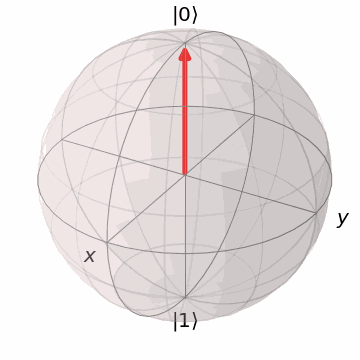

output state of initial state ket +

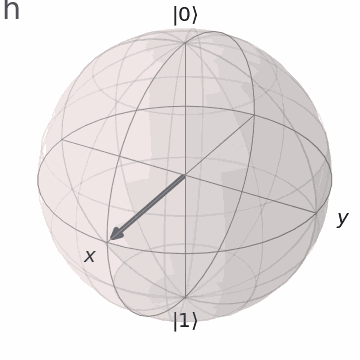

output state of initial state ket +i

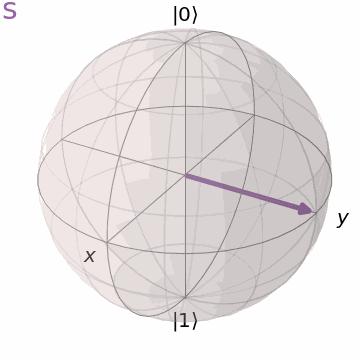

It is observed that all qubit states rotate about z axis by 180 degree except for the |0> which is coinciding with the z axis. The states |0> and |1> do not rotate with z operation like all other arbitary qubit states on the bloch sphere, therefore they are eigenstates of z operator.So the eigenstate of operation z are |0> and |1>.

Therefore the postulate that only possible outcomes of measuring an observable are the eigenvalues of its operator holds true

### Postulate 4: Quantum Measurement
#### The probability of measuring an eigenvalue is the modulus squared of the inner product of its corresponding eigenvector with the initial state.

When a measurement of an observable A is made on a generic state |ψ〉, the probability of obtaining an eigenvalue <b><i>a</i></b> is given by the square of the inner product of |ψ〉 with the eigenstate |<b><i>a</i></b>〉, 

$$|〈a|ψ〉|^2$$

Let's work out an example with the same qubit used in the first postulate
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\ket{q} = \frac{1}{\sqrt{2}}\ket{0} + \frac{i}{\sqrt{2}}\ket{1}$$

$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\ket{q} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1   \\ 0 \end{bmatrix} + \frac{i}{\sqrt{2}}\begin{bmatrix} 0   \\ 1 \end{bmatrix}$$

$$q =\begin{bmatrix} \frac{1}{\sqrt{2}}   \\ \frac{i}{\sqrt{2}} \end{bmatrix}$$

Probability of being in state |0> on measurement is given by inner product of |0> and the qubit |q>
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$$\braket{0}{q} = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}}   \\ \frac{i}{\sqrt{2}} \end{bmatrix}$$

$$\braket{0}{q} = \begin{bmatrix} \frac{1}{\sqrt{2}}   \\ 0 \end{bmatrix}$$

$$\braket{0}{q} = \frac{1}{\sqrt{2}}$$

Probability of measuring |0>:
$$|\braket{0}{q}|^2 = \frac{1}{{2}}$$

Probability of being in state |1> on measurement is given by inner product of |1> and the qubit |q>
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$$\braket{1}{q} = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}}   \\ \frac{i}{\sqrt{2}} \end{bmatrix}$$

$$\braket{1}{q} = \begin{bmatrix} 0   \\ \frac{i}{\sqrt{2}} \end{bmatrix}$$

$$\braket{1}{q} = \frac{i}{\sqrt{2}}$$

Probability of measuring |1>:
$$|\braket{1}{q}|^2 = \frac{1}{{2}}$$



These are the probabilities we get from the postulate:

Probability of measuring |0>:
$$|\braket{0}{q}|^2 = \frac{1}{{2}}$$
Probability of measuring |1>:
$$|\braket{1}{q}|^2 = \frac{1}{{2}}$$

And from the circuit we get this histogram of probabilities which is in coherence with the postulate

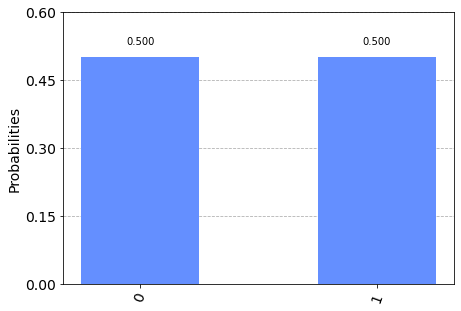

In [13]:
# Probability of the output state
counts = result.get_counts()
plot_histogram(counts)

### Postulate 5
#### After measurement, the quantum state collapses to the eigenvector corresponding to the observed eigenvalue.

Immediately after the measurement of an observable A has yielded a value <b><i>a</i></b>, the state of the system is the normalized eigenstate |<b><i>a</i></b>〉.

So measurements on application of the z operator will only give |0> or |1> as the output, like shown below. Also the default measurement axis is taken as z axis so the same holds

This is the output state after implementing z operator on the initial state of |0>

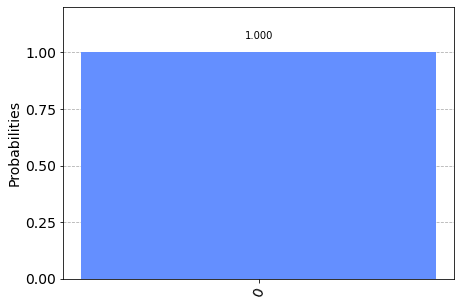

In [14]:
counts0 = result0.get_counts()
plot_histogram(counts0)

This is the output state after implementing z operator on the initial state of |+>

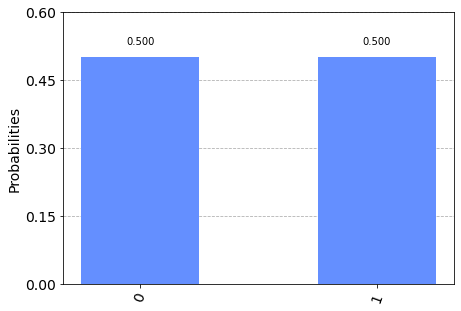

In [15]:
counts1 = result1.get_counts()
plot_histogram(counts1)

This is the output state after implementing z operator on the initial state of |+i>

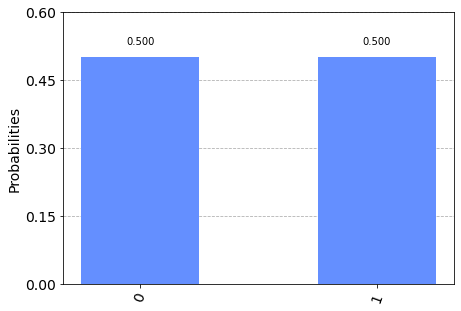

In [16]:
counts2 = result2.get_counts()
plot_histogram(counts2)

All of the output states are either |0> or |1>, the eigenvector of z operator

### Postulate 6

The time evolution of a quantum system preserves the normalization of the associated ket.
The time evolution of the state of a quantum system is described by |ψ(t)〉 = ˆU(t, t0)|ψ(t0)〉, for some unitary operator ˆU.

It's implications are discussed in depth in quantum circuit model section

## Key Takeaways

1. Quantum states in superposition are represented using ket in hilbert space.
2. Operators are used to transform one qubit state to another.
3. What are the states a qubit can take on measurement after the application of the operator? Eigenstates of the given operator
4. Now we know the states the qubit can be after the application of the operator. But how do we kow which state will it take out of all possible states (eigenstates). Probability! calculated by taking the the modulus squared of the inner product of every eigenvector with the initial state.
5. After measurement the probablistic nature of the qubit becomes deterministic. It collapses to any one of the possible eigenstates to a well defined classical state.
6. Time Evolution. If we know the final output state we can tell the inital state by applying all the operators applied in time, in reverse.